In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import talib as ta
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
np.random.seed(0)

In [2]:
filepath = f"./SPY_regime_-1.0_ewm.csv"
spy1_df = pd.read_csv(filepath)
spy1_df["date"] = pd.to_datetime(spy1_df["date"]).dt.date
spy1_df = spy1_df.set_index("date")
# returns = returns.dropna()
spy1_df['log_ret'] = (np.log(spy1_df.Adj_Close) - np.log(spy1_df.Adj_Close.shift(1))).dropna()

filepath2 = f"./SPY_regime_0.0_ewm.csv"
spy2_df = pd.read_csv(filepath2)
spy2_df["date"] = pd.to_datetime(spy2_df["date"]).dt.date
spy2_df = spy2_df.set_index("date")
# returns = returns.dropna()
spy2_df['log_ret'] = (np.log(spy2_df.Adj_Close) - np.log(spy2_df.Adj_Close.shift(1))).dropna()


In [3]:
regime_file1 = './SYN_SPY_2018_top50_-1.0_ewm.csv'
regime_file2 = './SYN_SPY_2018_top50_0.0_ewm.csv'
regime_1_df = pd.read_csv(regime_file1)
regime_1_df["date"] = pd.to_datetime(regime_1_df["date"])
regime_1_df = regime_1_df.set_index("date")
regime_2_df = pd.read_csv(regime_file2)
regime_2_df["date"] = pd.to_datetime(regime_2_df["date"])
regime_2_df = regime_2_df.set_index("date")
regime_1_df.head()

,price 3519,price 1323,price 212,price 2195,price 261,price 3736,price 1501,price 2027,price 419,price 2076,...,price 3510,price 3595,price 1491,price 2424,price 1035,price 373,price 1590,price 1457,price 3498,price 856
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,0.001588,-0.002111,-0.001164,-0.000847,-0.001093,-0.001310,-0.002059,0.010059,-0.000211,-0.000286,...,-0.002040,-0.000869,0.000072,0.003037,0.002655,-0.001247,0.002464,0.001375,0.000739,-0.000222
2013-01-03,-0.000356,0.002699,0.006673,0.000142,0.002834,0.001220,0.002072,0.006600,0.002579,0.001290,...,0.000779,-0.004183,0.001161,-0.000428,-0.001137,0.005278,0.000173,0.002225,0.002095,-0.001625
2013-01-04,0.003301,-0.005480,0.001716,0.006994,0.000522,0.007160,0.000508,-0.002757,-0.001501,0.002751,...,-0.001211,-0.000267,-0.003581,0.004774,-0.000245,0.004309,-0.000154,0.000473,0.003575,-0.002482
2013-01-05,0.003313,-0.000164,0.003008,0.001100,0.002310,0.004680,-0.002243,-0.001073,-0.000605,0.003570,...,0.003013,0.000791,0.002165,0.002450,-0.002530,-0.000288,-0.004382,-0.000892,-0.000310,-0.000532
2013-01-06,0.000310,-0.000658,0.003460,0.002084,-0.000721,0.000075,0.007004,-0.002035,0.006233,-0.000899,...,-0.003937,0.002962,0.000322,-0.001879,0.000115,0.009980,-0.006715,0.002816,-0.002939,-0.004909


In [4]:
regime_2_df.head()

,price 1146,price 2526,price 3021,price 3443,price 111,price 3544,price 3339,price 3817,price 187,price 1081,...,price 1850,price 3428,price 138,price 367,price 1214,price 1900,price 73,price 2891,price 3525,price 3965
date,,,,,,,,,,,,,,,,,,,,,
2015-08-31,-0.011689,0.009703,0.004461,0.016444,0.013260,-0.018217,-0.033733,-0.003320,-0.012851,-0.000752,...,0.001556,0.001074,-0.008808,0.017974,-0.014169,-0.015736,0.018404,-0.013267,-0.004532,-0.000785
2015-09-01,0.011025,0.016398,0.000517,0.000502,0.020954,-0.014084,-0.024388,-0.023225,-0.017116,-0.006442,...,0.004881,0.006730,-0.027764,0.024080,0.012707,-0.005855,0.004032,0.018849,-0.000806,-0.006164
2015-09-02,-0.000158,-0.022474,0.017608,-0.002186,-0.021352,0.012305,-0.004375,-0.019118,-0.015354,-0.006146,...,0.013094,-0.023158,-0.002020,-0.025292,-0.007707,0.010601,-0.009517,0.020214,0.004428,-0.003148
2015-09-03,0.005109,-0.023673,0.000762,0.012371,0.004165,0.004663,0.015586,0.000804,-0.000567,0.008158,...,-0.012678,0.001343,0.009465,-0.002496,-0.002873,-0.002796,0.009745,-0.012371,0.008008,0.008983
2015-09-04,-0.019895,-0.007119,-0.019546,0.004826,-0.006837,-0.000209,0.005828,-0.006103,0.003344,-0.022200,...,0.000878,0.013680,0.016804,-0.006896,0.009640,0.011229,0.014154,-0.018352,0.006167,-0.020322


## Load SPY prices containing out-of-sample data

In [5]:
act_file_path = "./SPY.csv"
act_df = pd.read_csv(act_file_path)
act_df["date"] = pd.to_datetime(act_df["date"])
act_df = act_df.set_index("date")
act_df_trunc = act_df[act_df.index<='2018-12-31']
act_df_trunc.tail()
act_df_os = act_df[act_df.index>'2018-12-31']
act_df_os.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
date,,,,,,,,,,,,
2019-01-02,245.98,251.21,245.95,250.18,126743877,0.0,1,238.881259,243.960327,238.852125,242.960051,126743877
2019-01-03,248.23,248.57,243.67,244.21,143872958,0.0,1,241.066326,241.396514,236.637923,237.162340,143872958
2019-01-04,247.59,253.11,247.17,252.39,142573163,0.0,1,240.444796,245.805494,240.036917,245.106273,142573163
2019-01-07,252.69,255.95,251.69,254.38,103014490,0.0,1,245.397615,248.563535,244.426474,247.038844,103014490
2019-01-08,256.82,257.31,254.00,256.77,102313170,0.0,1,249.408427,249.884287,246.669810,249.359870,102313170


## Creating Price Series from synthetic returns

In [6]:
start_val = act_df_trunc["Adj_Close"].iloc[0]
regime_1_price_df = start_val*(np.exp(regime_1_df).cumprod())
regime_1_col_names = [f"price_{i}" for i in range(regime_1_price_df.shape[1])]
regime_1_price_df.columns = regime_1_col_names
regime_1_price_df.head()

,price_0,price_1,price_2,price_3,price_4,price_5,price_6,price_7,price_8,price_9,...,price_40,price_41,price_42,price_43,price_44,price_45,price_46,price_47,price_48,price_49
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,126.085806,125.620198,125.739323,125.779190,125.748249,125.720908,125.626813,127.158406,125.859157,125.849659,...,125.629208,125.776312,125.894828,126.268601,126.220378,125.728877,126.196283,126.058892,125.978832,125.857723
2013-01-03,126.040958,125.959666,126.581140,125.797103,126.105139,125.874430,125.887438,128.000450,126.184205,126.012114,...,125.727092,125.251306,126.041057,126.214622,126.076980,126.394259,126.218089,126.339658,126.243017,125.653420
2013-01-04,126.457762,125.271265,126.798559,126.680036,126.170924,126.778885,125.951449,127.648018,125.994961,126.359238,...,125.574882,125.217896,125.590510,126.818557,126.046101,126.940070,126.198645,126.399433,126.695097,125.341935
2013-01-05,126.877415,125.250662,127.180593,126.819445,126.462745,127.373616,125.669289,127.511080,125.918806,126.811083,...,125.953797,125.317013,125.862765,127.129648,125.727629,126.903570,125.646878,126.286783,126.655766,125.275237
2013-01-06,126.916725,125.168327,127.621443,127.083967,126.371554,127.383194,126.552518,127.251891,126.706109,126.697131,...,125.458832,125.688718,125.903338,126.890942,125.742144,128.176470,124.805941,126.642861,126.284076,124.661764


In [7]:
start_val = act_df_trunc["Adj_Close"].iloc[0]
regime_2_price_df = start_val*(np.exp(regime_2_df).cumprod())
regime_2_col_names = [f"price_{i}" for i in range(regime_2_price_df.shape[1])]
regime_2_price_df.columns = regime_2_col_names

regime_2_price_df.head()

,price_0,price_1,price_2,price_3,price_4,price_5,price_6,price_7,price_8,price_9,...,price_40,price_41,price_42,price_43,price_44,price_45,price_46,price_47,price_48,price_49
date,,,,,,,,,,,,,,,,,,,,,
2015-08-31,124.422809,127.113083,126.448494,127.972938,127.566063,123.613253,121.710011,125.468428,124.278285,125.791086,...,126.081804,126.020927,124.781789,128.168880,124.114597,123.920290,128.223955,124.226603,125.316513,125.786880
2015-09-01,125.802156,129.214711,126.513856,128.037164,130.267315,121.884508,118.777703,122.588045,122.169282,124.983324,...,126.698713,126.871971,121.365050,131.292612,125.701779,123.196820,128.742006,126.590369,125.215514,125.013863
2015-09-02,125.782338,126.343125,128.761249,127.757553,127.515367,123.393602,118.259222,120.266653,120.307762,124.217561,...,128.368643,123.967599,121.120129,128.013550,124.736691,124.509803,127.522588,129.175356,125.771157,124.620958
2015-09-03,126.426608,123.387358,128.859423,129.347884,128.047574,123.970294,120.116870,120.363441,120.239591,125.235068,...,126.751429,124.134230,122.271962,127.694432,124.378857,124.162146,128.771402,127.587135,126.782394,125.745453
2015-09-04,123.936243,122.512058,126.365232,129.973646,127.175131,123.944366,120.818988,119.631147,120.642359,122.485448,...,126.862774,125.844107,124.343929,126.816844,125.583637,125.564193,130.606962,125.267006,127.566722,123.215816


In [8]:
start_val = act_df_trunc["Adj_Close"].iloc[0]
spy1_df["recon_Adj_Close"] =  start_val*(np.exp(spy1_df["log_ret"]).cumprod())
spy2_df["recon_Adj_Close"] =  start_val*(np.exp(spy2_df["log_ret"]).cumprod())

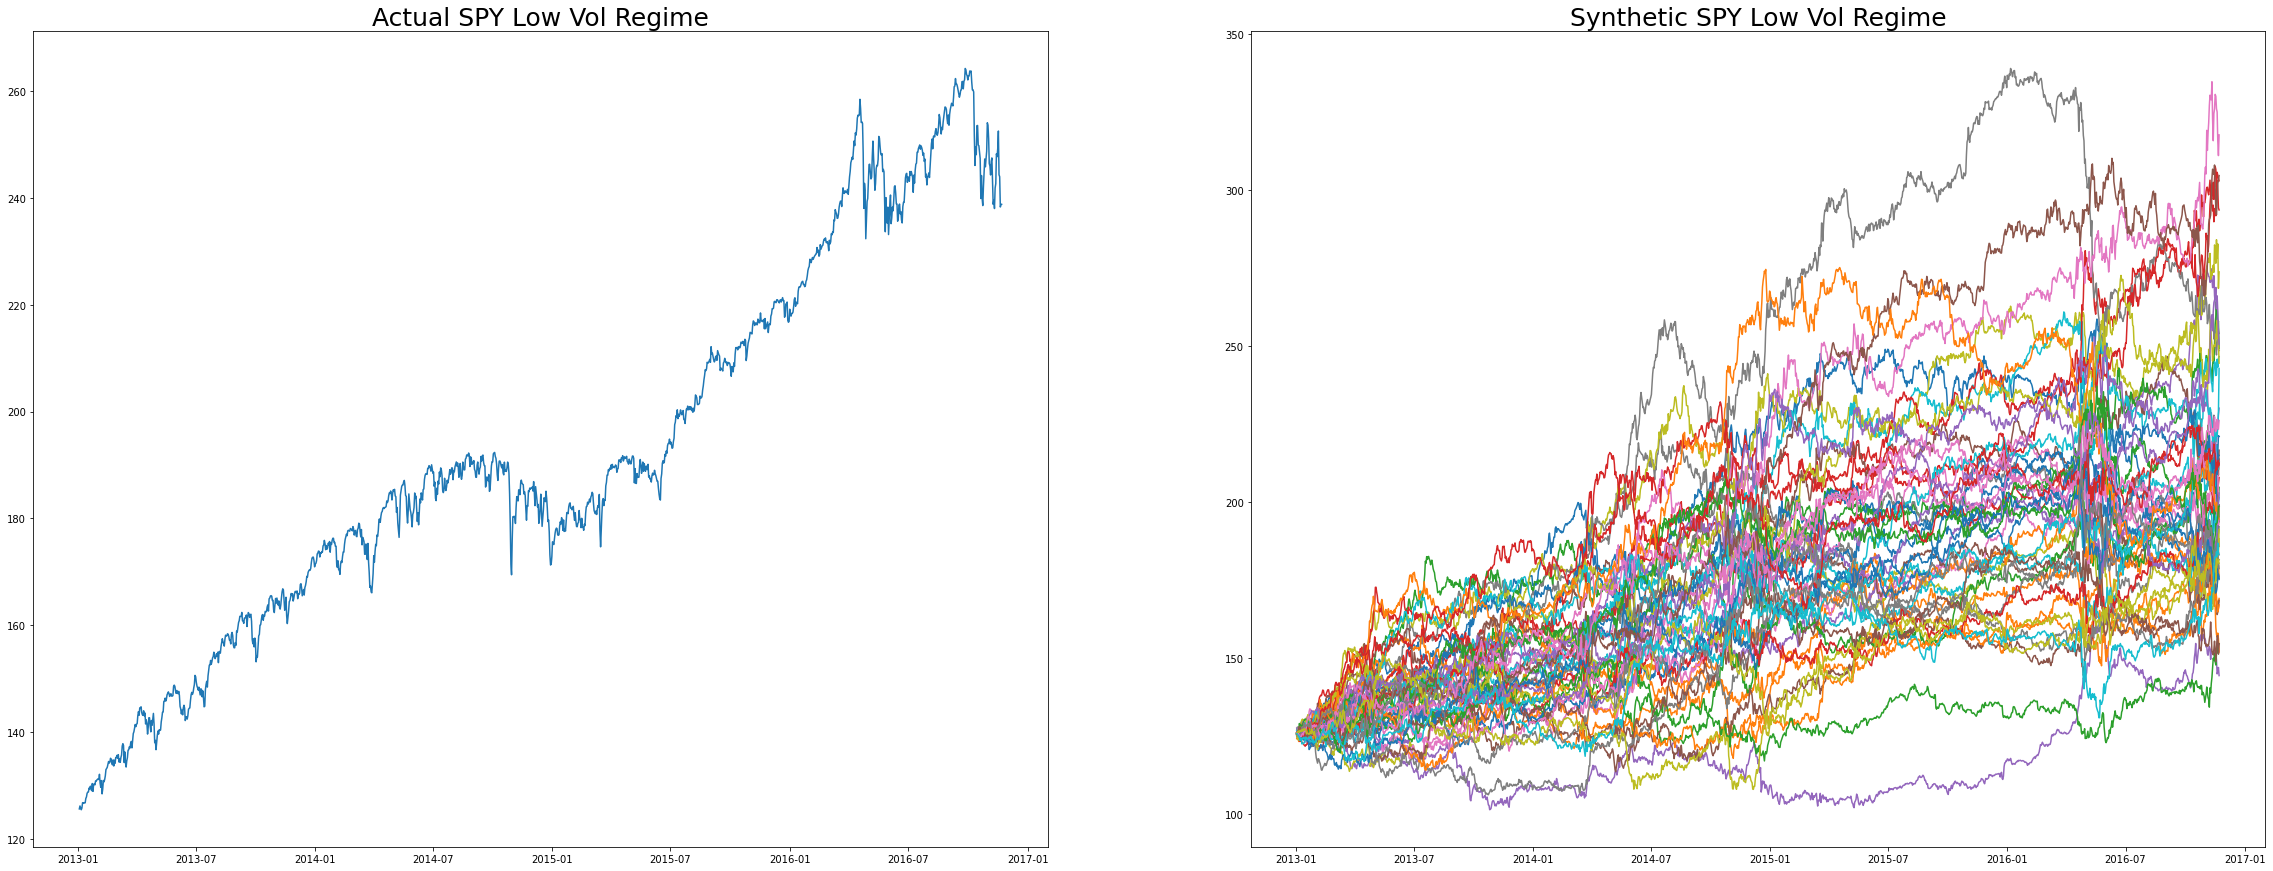

In [9]:
fig, ax = plt.subplots(1,2, figsize=(40, 15)) # plt.title('Temperature \n Humidity', fontsize=100)
ax[0].set_title("Actual SPY Low Vol Regime", fontsize=25)
ax[1].set_title("Synthetic SPY Low Vol Regime", fontsize=25)
ax[0].plot(spy1_df["recon_Adj_Close"]);
ax[1].plot(regime_1_price_df);

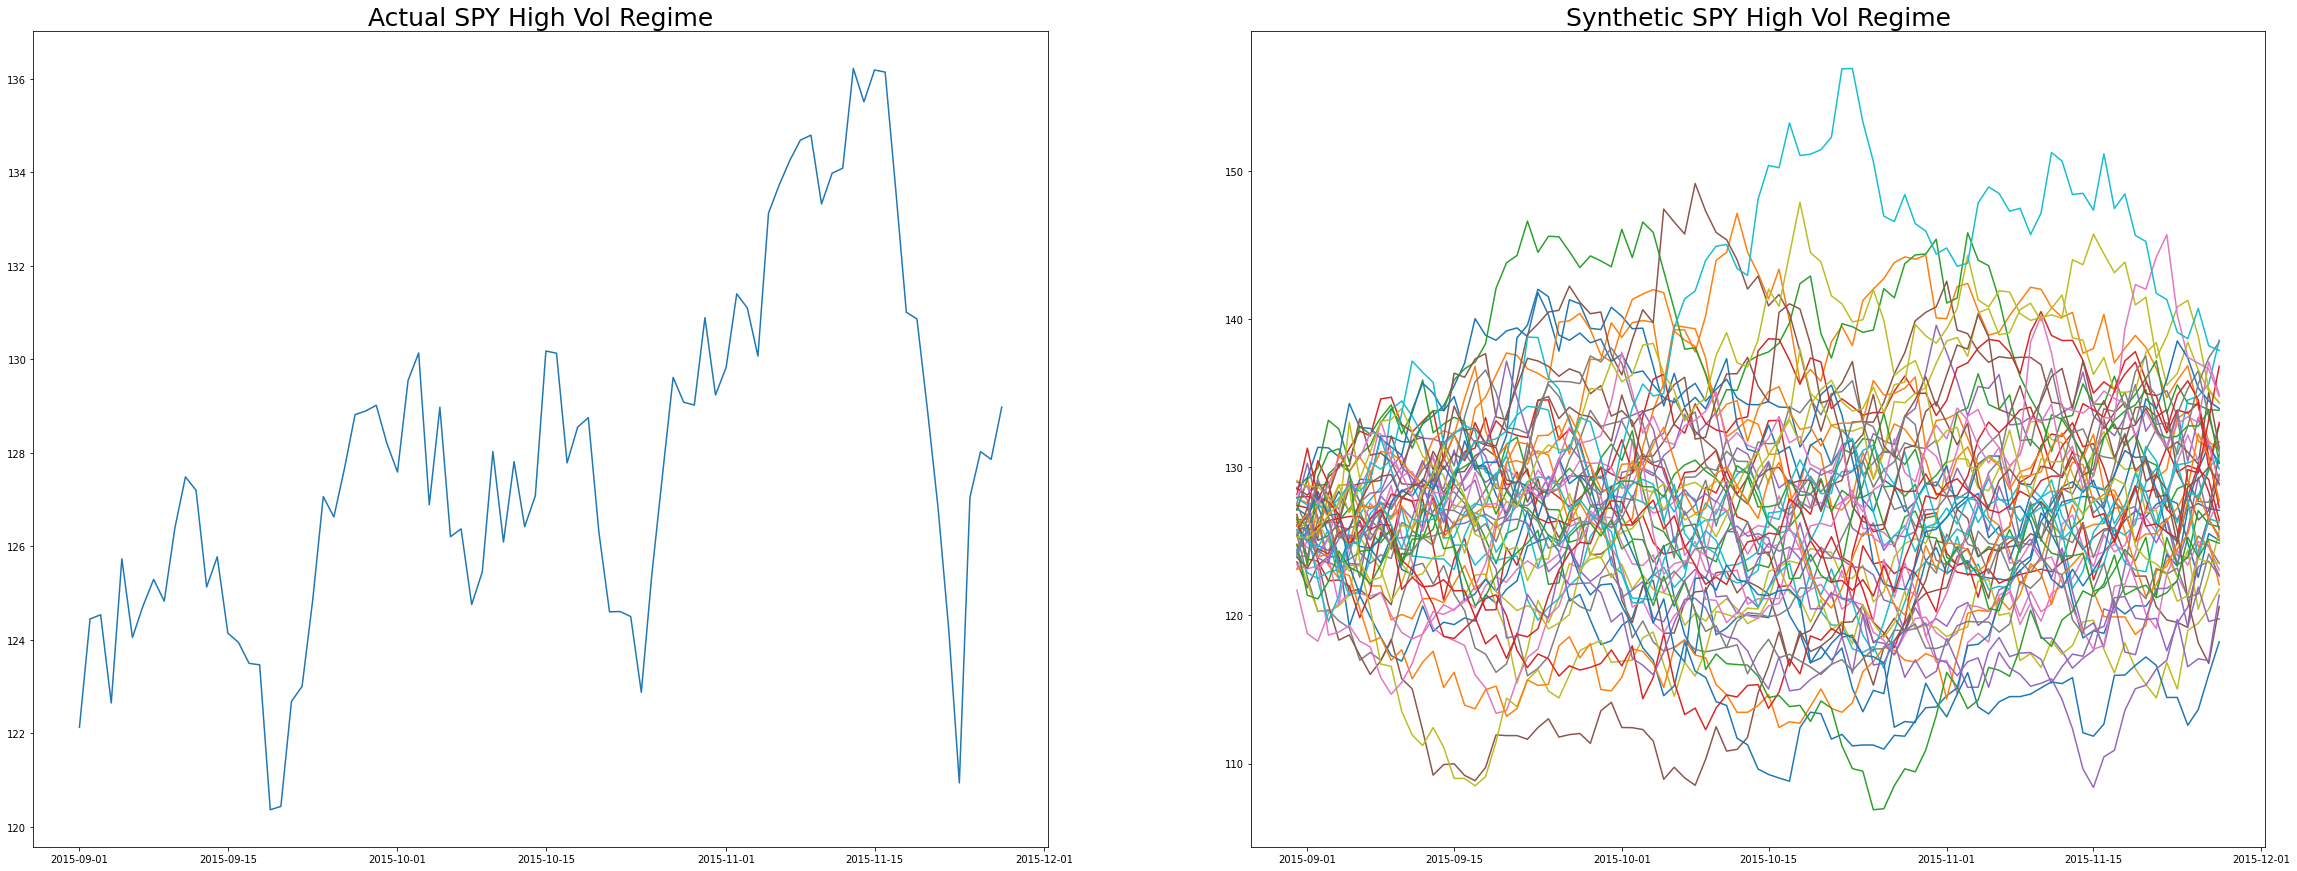

In [10]:
fig, ax = plt.subplots(1,2, figsize=(40, 15))
ax[0].set_title("Actual SPY High Vol Regime", fontsize=25)
ax[1].set_title("Synthetic SPY High Vol Regime", fontsize=25)
ax[0].plot(spy2_df["recon_Adj_Close"]);
ax[1].plot(regime_2_price_df);

## Create function for a BBAND strategy

In [11]:
def gen_bband_signals(df, lbk, band_dev):
    close_price = df.values
    u_band, l_band, m_band = ta.BBANDS(close_price, timeperiod=lbk, nbdevup=band_dev,
                                           nbdevdn=band_dev, matype=3)
    
    bb_signals = np.asarray(np.zeros(close_price.shape)).astype(float)
    for i in range(lbk, len(bb_signals) - 1):
        if close_price[i] > u_band[i]:
            bb_signals[i] = 1
        elif close_price[i] < u_band[i] and close_price[i] >= m_band[i] and bb_signals[i - 1] == 1:
            bb_signals[i] = 1
        elif close_price[i] < l_band[i]:
            bb_signals[i] = -1
        elif close_price[i] > l_band[i] and close_price[i] <= m_band[i] and bb_signals[i - 1] == -1:
            bb_signals[i] = -1
        else:
            bb_signals[i] = 0
    
    return pd.Series(bb_signals, index=df.index)    

## Create a parameter generator function

In [12]:
import itertools
def param_gen(param_list1, param_list2):
    return [params for params in itertools.product(param_list1, param_list2)]



## running strategy parameters on synthetic prices

In [13]:
def run_param_simulation(prices_df, param_list1, param_list2):
    param_sets = param_gen(param_list1, param_list2)
    mean_ret_list, stdev_list, param_list = [], [], []
    pctile_list = []
    for params in param_sets:
        strat_signals = prices_df.apply(gen_bband_signals, args = [params[0], params[1]])
        strat_returns = prices_df.pct_change(1)
        strat_perf = strat_signals.shift(2)*strat_returns
        mean_ret_list.append(strat_perf.sum(axis=0).mean())
        stdev_list.append(strat_perf.sum(axis=0).std())
        param_list.append(f"lbk={params[0]}_band={params[1]}")
        pctile_list.append(np.percentile(strat_perf.sum(axis=0), 0.1))
        
    return pd.DataFrame({"params": param_list, "mean_return":mean_ret_list, "stdev_return":stdev_list, "10_percentile_return": pctile_list})

In [14]:
regime1_params_df = run_param_simulation(regime_1_price_df, [10, 20, 40, 50, 60, 80, 125], [1, 1.5, 2, 2.5, 3])
regime1_params_df.sort_values(by=["mean_return"], ascending=False).head(10)

,params,mean_return,stdev_return,10_percentile_return
13,lbk=40_band=2.5,0.160987,0.292706,-0.566362
11,lbk=40_band=1.5,0.157259,0.267162,-0.459452
17,lbk=50_band=2,0.153451,0.246426,-0.564509
16,lbk=50_band=1.5,0.153148,0.284339,-0.572467
25,lbk=80_band=1,0.137037,0.253735,-0.488103
21,lbk=60_band=1.5,0.136425,0.291135,-0.649798
12,lbk=40_band=2,0.131608,0.244813,-0.697184
26,lbk=80_band=1.5,0.127187,0.274369,-0.606843
15,lbk=50_band=1,0.121313,0.271381,-0.508462
6,lbk=20_band=1.5,0.115015,0.248762,-0.404729


In [15]:
regime2_params_df = run_param_simulation(regime_2_price_df, [10, 20, 40, 60, 80, 125], [1, 1.5, 2, 2.5, 3])
regime2_params_df[regime2_params_df["mean_return"]!=0].sort_values(by=["mean_return"], ascending=False).head(10)

,params,mean_return,stdev_return,10_percentile_return
6,lbk=20_band=1.5,0.006048,0.076144,-0.219411
10,lbk=40_band=1,0.005533,0.035488,-0.053195
11,lbk=40_band=1.5,0.003112,0.033241,-0.052823
14,lbk=40_band=3,0.000035,0.033038,-0.043573
13,lbk=40_band=2.5,-0.000052,0.033555,-0.052804
12,lbk=40_band=2,-0.000792,0.033611,-0.052804
7,lbk=20_band=2,-0.002059,0.062380,-0.135197
2,lbk=10_band=2,-0.012680,0.069832,-0.131234
8,lbk=20_band=2.5,-0.013961,0.057289,-0.137812
5,lbk=20_band=1,-0.014373,0.083520,-0.137102


## running strategy parameters on actual prices

In [16]:
act1_trunc_params_df = run_param_simulation(spy1_df["recon_Adj_Close"].to_frame(), [10, 20, 40, 60, 80, 125], [1, 1.5, 2, 2.5, 3])
act1_trunc_params_df.sort_values(by=["mean_return"], ascending=False).head(10)

,params,mean_return,stdev_return,10_percentile_return
26,lbk=125_band=1.5,-0.009509,NaN,-0.009509
27,lbk=125_band=2,-0.016795,NaN,-0.016795
0,lbk=10_band=1,-0.087420,NaN,-0.087420
1,lbk=10_band=1.5,-0.114886,NaN,-0.114886
5,lbk=20_band=1,-0.161860,NaN,-0.161860
21,lbk=80_band=1.5,-0.212766,NaN,-0.212766
22,lbk=80_band=2,-0.255993,NaN,-0.255993
2,lbk=10_band=2,-0.266329,NaN,-0.266329
3,lbk=10_band=2.5,-0.266329,NaN,-0.266329
4,lbk=10_band=3,-0.266329,NaN,-0.266329


In [17]:
act2_trunc_params_df = run_param_simulation(spy2_df["recon_Adj_Close"].to_frame(), [10, 20, 40, 60, 80, 125], [1, 1.5, 2, 2.5, 3])
act2_trunc_params_df[act2_trunc_params_df["mean_return"]!=0].sort_values(by=["mean_return"], ascending=False).head(10)

,params,mean_return,stdev_return,10_percentile_return
1,lbk=10_band=1.5,0.036104,NaN,0.036104
10,lbk=40_band=1,0.012375,NaN,0.012375
11,lbk=40_band=1.5,0.012375,NaN,0.012375
12,lbk=40_band=2,0.012375,NaN,0.012375
13,lbk=40_band=2.5,0.012375,NaN,0.012375
14,lbk=40_band=3,0.012375,NaN,0.012375
2,lbk=10_band=2,-0.012616,NaN,-0.012616
3,lbk=10_band=2.5,-0.012616,NaN,-0.012616
4,lbk=10_band=3,-0.012616,NaN,-0.012616
6,lbk=20_band=1.5,-0.026929,NaN,-0.026929


# comparing the best performing parameter sets from synthetic and actual prices

## Running Out-of-Sample performance on best parameter found on actual prices

In [18]:
import re
param_list = re.findall(r'''(\d+(?:\.\d+)*)''', act1_trunc_params_df.sort_values(by=["mean_return"], ascending=False)["params"].iloc[0])
best_act_param_df = run_param_simulation(act_df_os["Adj_Close"].to_frame(), [int(param_list[0])], [float(param_list[1])])
best_act_param_df

,params,mean_return,stdev_return,10_percentile_return
0,lbk=125_band=1.5,-0.038449,NaN,-0.038449


In [19]:
best_returns1 = regime1_params_df.sort_values(by=["mean_return"], ascending=False).head(10)["params"]
best_stdev1 = regime1_params_df.loc[regime1_params_df["mean_return"]>0].sort_values(by=["stdev_return"], ascending=True).head(10)["params"]
best_10_pct1 = regime1_params_df.loc[regime1_params_df["mean_return"]>0].sort_values(by=["10_percentile_return"], ascending=False).head(10)["params"]
best_params1 = list(set(best_returns1).intersection(set(best_stdev1)).intersection(set(best_10_pct1)))
best_params_perf1 = regime1_params_df.loc[regime1_params_df["params"].isin(best_params1)]
best_params_perf1

,params,mean_return,stdev_return,10_percentile_return
6,lbk=20_band=1.5,0.115015,0.248762,-0.404729


In [20]:
best_returns2 = regime2_params_df.sort_values(by=["mean_return"], ascending=False).head(10)["params"]
best_stdev2 = regime2_params_df.loc[regime2_params_df["mean_return"]>0].sort_values(by=["stdev_return"], ascending=True).head(10)["params"]
best_10_pct2 = regime2_params_df.loc[regime2_params_df["mean_return"]>0].sort_values(by=["10_percentile_return"], ascending=False).head(10)["params"]
# best_params = best_returns.intersection(best_stdev).intersection(best_10_pct)
best_params2 = list(set(best_returns2).intersection(set(best_stdev2)).intersection(set(best_10_pct2)))
best_params_perf2 = regime2_params_df.loc[regime2_params_df["params"].isin(best_params2)]
best_params_perf2

,params,mean_return,stdev_return,10_percentile_return
6,lbk=20_band=1.5,0.006048,0.076144,-0.219411
10,lbk=40_band=1,0.005533,0.035488,-0.053195
11,lbk=40_band=1.5,0.003112,0.033241,-0.052823
14,lbk=40_band=3,0.000035,0.033038,-0.043573


In [21]:
def gen_bband_multi_regime_signals(df, lbk1, band_dev1, lbk2, band_dev2, regime_thresh):
    close_price = df["Adj_Close"].values
    vix_close_lag1 = df["VIX Close"].shift(1).values
    
    u_band_1, l_band_1, m_band_1 = ta.BBANDS(close_price, timeperiod=lbk1, nbdevup=band_dev1,
                                           nbdevdn=band_dev1, matype=3)
        
    u_band_2, l_band_2, m_band_2 = ta.BBANDS(close_price, timeperiod=lbk2, nbdevup=band_dev2,
                                           nbdevdn=band_dev2, matype=3)
    
    bb_signals = np.asarray(np.zeros(close_price.shape)).astype(float)

    for i in range(max(lbk1, lbk2), len(bb_signals) - 1):

        if vix_close_lag1[i] <= regime_thresh:

            if close_price[i] > u_band_1[i]:
                bb_signals[i] = 1
            elif close_price[i] < u_band_1[i] and close_price[i] >= m_band_1[i] and bb_signals[i - 1] == 1:
                bb_signals[i] = 1
            elif close_price[i] < l_band_1[i]:
                bb_signals[i] = -1
            elif close_price[i] > l_band_1[i] and close_price[i] <= m_band_1[i] and bb_signals[i - 1] == -1:
                bb_signals[i] = -1
            else:
                bb_signals[i] = 0
                
        elif vix_close_lag1[i] > regime_thresh:
            if close_price[i] > u_band_2[i]:
                bb_signals[i] = 1
            elif close_price[i] < u_band_2[i] and close_price[i] >= m_band_2[i] and bb_signals[i - 1] == 1:
                bb_signals[i] = 1
            elif close_price[i] < l_band_2[i]:
                bb_signals[i] = -1
            elif close_price[i] > l_band_2[i] and close_price[i] <= m_band_2[i] and bb_signals[i - 1] == -1:
                bb_signals[i] = -1
            else:
                bb_signals[i] = 0

    
    return pd.Series(bb_signals, index=df.index) 

In [22]:
vix_file_path = "/Users/sujitkhanna/Desktop/Talos/marketing_material/misc_material/tactical trading framework/vixcurrent.csv"
vix_df = pd.read_csv(vix_file_path)
vix_df["date"] = pd.to_datetime(vix_df["date"])
vix_df = vix_df.set_index("date")
impvol_ema_df = vix_df["VIX Close"].ewm(halflife=10).mean().to_frame()
impvol_ema_df.head()

,VIX Close
date,
2004-01-02,18.220000
2004-01-05,17.842355
2004-01-06,17.445593
2004-01-07,16.907518
2004-01-08,16.610854


In [23]:
act_os_vix_df =act_df_os.join(impvol_ema_df, how='left').ffill()
act_os_vix_df.head()
# act_os_vix_df["VIX Close"].shift(1)

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,VIX Close
date,,,,,,,,,,,,,
2019-01-02,245.98,251.21,245.95,250.18,126743877,0.0,1,238.881259,243.960327,238.852125,242.960051,126743877,24.329345
2019-01-03,248.23,248.57,243.67,244.21,143872958,0.0,1,241.066326,241.396514,236.637923,237.162340,143872958,24.404392
2019-01-04,247.59,253.11,247.17,252.39,142573163,0.0,1,240.444796,245.805494,240.036917,245.106273,142573163,24.201858
2019-01-07,252.69,255.95,251.69,254.38,103014490,0.0,1,245.397615,248.563535,244.426474,247.038844,103014490,24.014225
2019-01-08,256.82,257.31,254.00,256.77,102313170,0.0,1,249.408427,249.884287,246.669810,249.359870,102313170,23.776879


In [24]:
strat_signals_act = gen_bband_multi_regime_signals(act_os_vix_df, 250, 20, 10, 1.5, 20)
underlying_returns = act_os_vix_df["Adj_Close"].pct_change(1)
strat_perf_act = strat_signals_act.shift(2)*underlying_returns
regime_act_df = pd.DataFrame({"params": ["lbk=250/10_band=200/1.5"], "mean_return":strat_perf_act.sum(axis=0).mean(), "stdev_return":strat_perf_act.sum(axis=0).std(), "10_percentile_return": np.percentile(strat_perf_act.sum(axis=0), 0.1)})
regime_act_df

,params,mean_return,stdev_return,10_percentile_return
0,lbk=250/10_band=200/1.5,0.079288,0.0,0.079288


In [25]:
strat_perf_act_df = strat_perf_act.to_frame()
strat_perf_act_df.columns = ["strat_returns"]
strat_perf_act_df = act_os_vix_df.join(strat_perf_act_df, how="left").fillna(0)
strat_perf_act_df["VIX Close Lag"] = strat_perf_act_df["VIX Close"].shift(1).fillna(0)
strat_act_reg_1 = strat_perf_act_df[strat_perf_act_df["VIX Close Lag"]<=20]
strat_act_reg_2 = strat_perf_act_df[strat_perf_act_df["VIX Close Lag"]>20]
print(f"strategy return in low volatility regime is: {strat_act_reg_1.strat_returns.sum()} and in high volatility regime is: {strat_act_reg_2.strat_returns.sum()}")

strategy return in low volatility regime is: 0.0 and in high volatility regime is: 0.07928802522667144


In [26]:
strat_act_reg_1 = strat_perf_act_df[strat_perf_act_df["VIX Close Lag"]<=20]
strat_act_reg_2 = strat_perf_act_df[strat_perf_act_df["VIX Close Lag"]>20]
print(f"strategy return in low volatility regime is: {strat_act_reg_1.strat_returns.sum()} and in high volatility regime is: {strat_act_reg_2.strat_returns.sum()}")

strategy return in low volatility regime is: 0.0 and in high volatility regime is: 0.07928802522667144


## Running Out-of-Sample performance on best parameter found on synthetic prices

In [27]:
strat_signals_syn = gen_bband_multi_regime_signals(act_os_vix_df, 20, 1.5, 40, 1, 20)
strat_perf_syn = strat_signals_syn.shift(2)*underlying_returns
regime_syn_df = pd.DataFrame({"params": ["lbk=20/40_band=1.5/1"], "mean_return":strat_perf_syn.sum(axis=0).mean(), "stdev_return":strat_perf_syn.sum(axis=0).std(), "10_percentile_return": np.percentile(strat_perf_syn.sum(axis=0), 0.1)})
regime_syn_df

,params,mean_return,stdev_return,10_percentile_return
0,lbk=20/40_band=1.5/1,0.378265,0.0,0.378265


In [28]:
strat_perf_syn_df = strat_perf_syn.to_frame()
strat_perf_syn_df.columns = ["strat_returns"]
strat_perf_syn_df = act_os_vix_df.join(strat_perf_syn_df, how="left").fillna(0)
strat_perf_syn_df["VIX Close Lag"] = strat_perf_syn_df["VIX Close"].shift(1).fillna(0)
strat_syn_reg_1 = strat_perf_syn_df[strat_perf_syn_df["VIX Close Lag"]<=20]
strat_syn_reg_2 = strat_perf_syn_df[strat_perf_syn_df["VIX Close Lag"]>20]
print(f"strategy return in low volatility regime is: {strat_syn_reg_1.strat_returns.sum()} and in high volatility regime is: {strat_syn_reg_2.strat_returns.sum()}")

strategy return in low volatility regime is: 0.03793275450103961 and in high volatility regime is: 0.340332731206179
